<a href="https://colab.research.google.com/github/alvinfranklyndavis/Project2023_v3/blob/main/Project2023_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import gdown

# Define the URL of the CSV file
csv_url = 'https://drive.google.com/uc?id=1o87z4evvCLwBtqX8ocZl3I2nIDYS8mtH'

# Define the local file path to save the CSV
csv_path = 'Training_Testing_Hybrid_Mod.csv'

# Download the CSV file from the Google Drive link
gdown.download(csv_url, csv_path, quiet=False)

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows and data types
print(df.head())
print(df.dtypes)


Downloading...
From: https://drive.google.com/uc?id=1o87z4evvCLwBtqX8ocZl3I2nIDYS8mtH
To: /content/Training_Testing_Hybrid_Mod.csv
100%|██████████| 71.9k/71.9k [00:00<00:00, 8.43MB/s]

       Date  Day of the Week  Morning  Prev_Week  Rep_Prev_Week  \
0  8/1/2018                3       19          7              0   
1  8/2/2018                4       31         11              0   
2  8/3/2018                5       15         19              0   
3  8/4/2018                6       31         35              0   
4  8/6/2018                1       31         18              0   

   Rep_Prev_Entry  Afternoon  Prev_Week.1  Rep_Prev_Week.1  Rep_Prev_Entry.1  \
0               0         14           13                0                 0   
1               0          3           21                0                 0   
2               0          9           19                0                 0   
3               0         21           20                0                 0   
4               0         31           30                0                 1   

   Evening  Prev_Week.2  Rep_Prev_Week.2  Rep_Prev_Entry.2  Night  \
0       33           28                0       

In [2]:
# Confirm the CSV file contains data
print("Number of Rows in CSV:", len(df))


Number of Rows in CSV: 1409


Date                0
Day of the Week     0
Morning             0
Prev_Week           0
Rep_Prev_Week       0
Rep_Prev_Entry      0
Afternoon           0
Prev_Week.1         0
Rep_Prev_Week.1     0
Rep_Prev_Entry.1    0
Evening             0
Prev_Week.2         0
Rep_Prev_Week.2     0
Rep_Prev_Entry.2    0
Night               0
Prev_Week.3         0
Rep_Prev_Week.3     0
Rep_Prev_Entry.3    0
dtype: int64
Date                object
Day of the Week      int64
Morning              int64
Prev_Week            int64
Rep_Prev_Week        int64
Rep_Prev_Entry       int64
Afternoon            int64
Prev_Week.1          int64
Rep_Prev_Week.1      int64
Rep_Prev_Entry.1     int64
Evening              int64
Prev_Week.2          int64
Rep_Prev_Week.2      int64
Rep_Prev_Entry.2     int64
Night                int64
Prev_Week.3          int64
Rep_Prev_Week.3      int64
Rep_Prev_Entry.3     int64
dtype: object


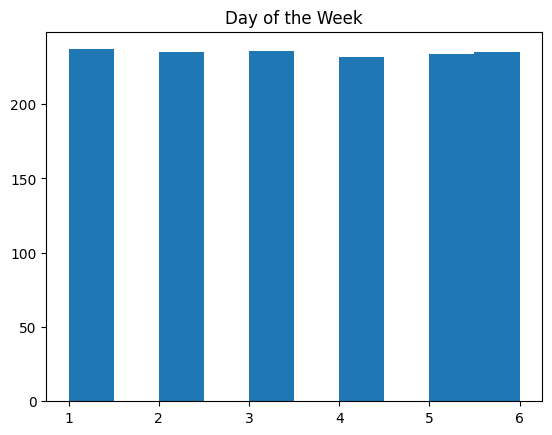

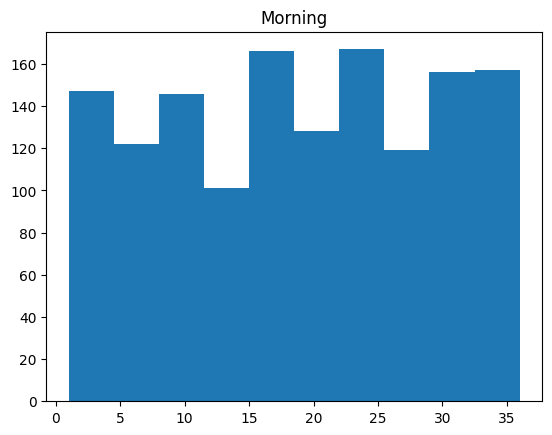

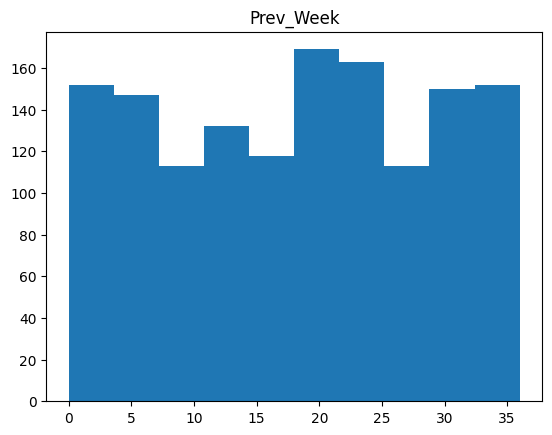

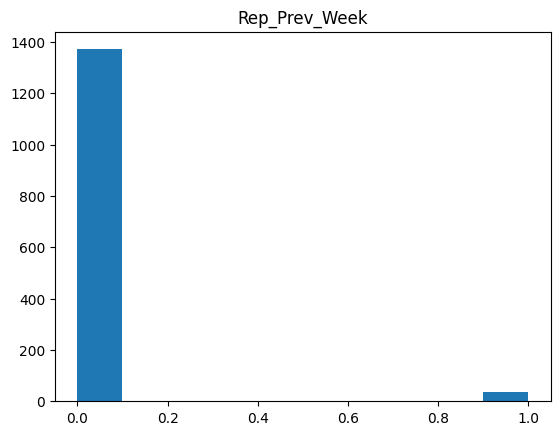

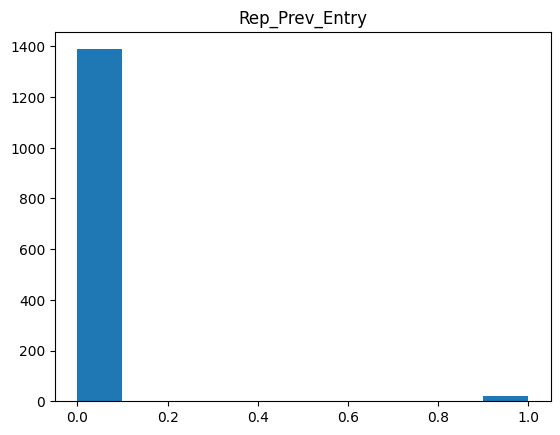

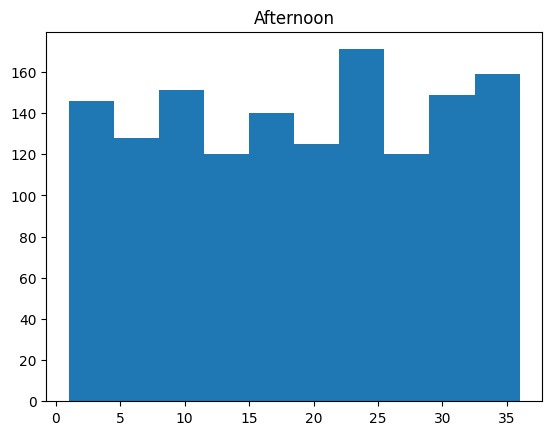

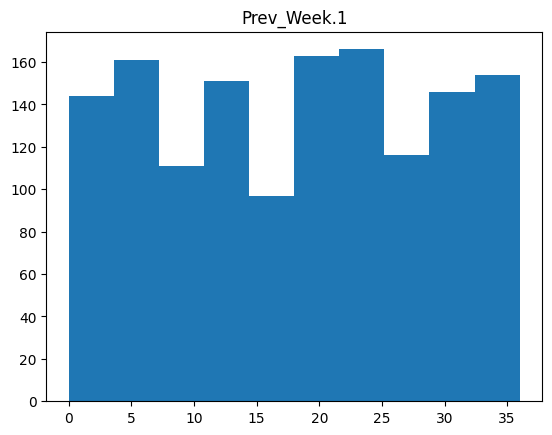

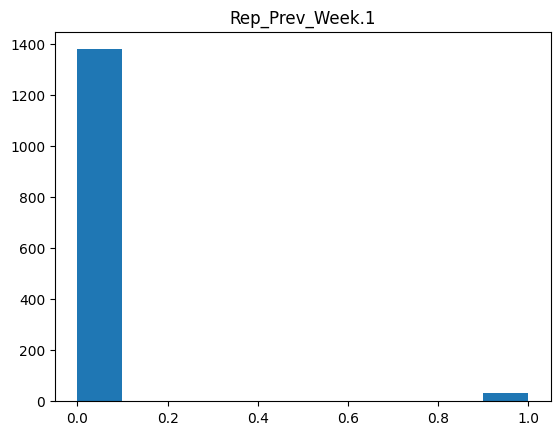

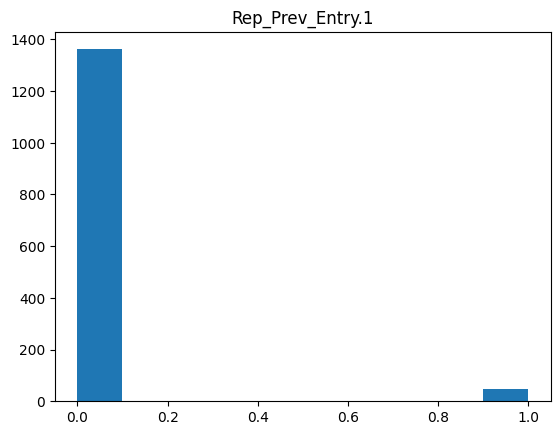

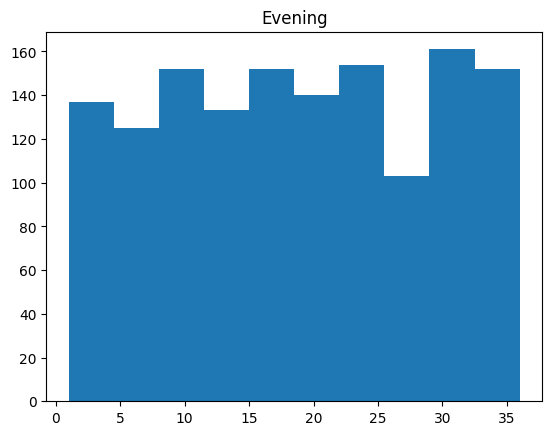

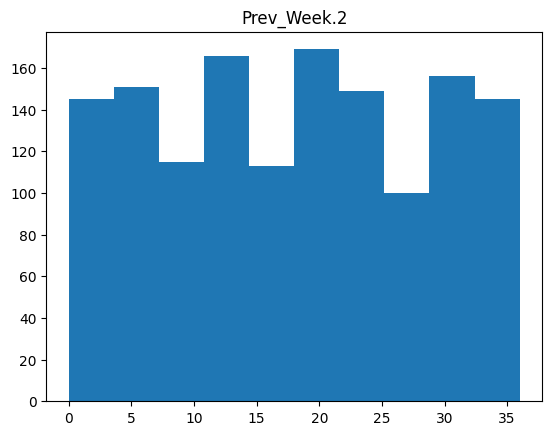

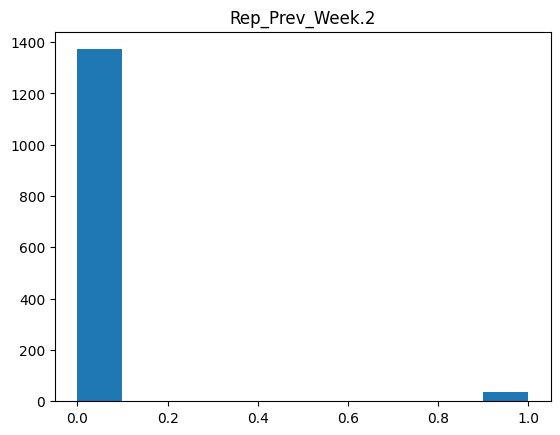

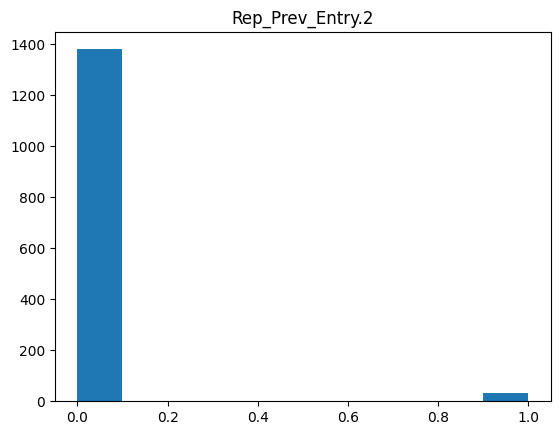

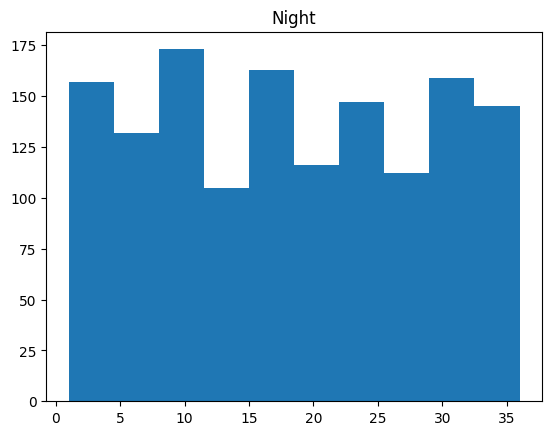

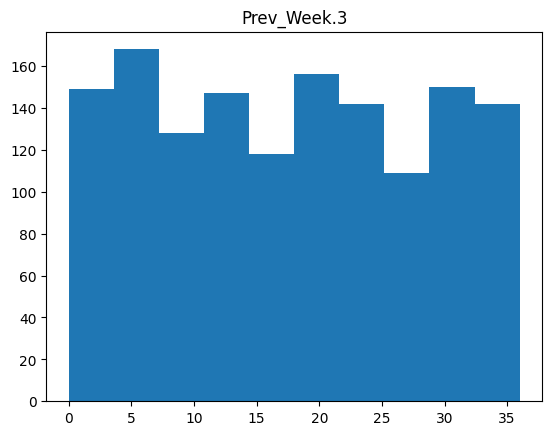

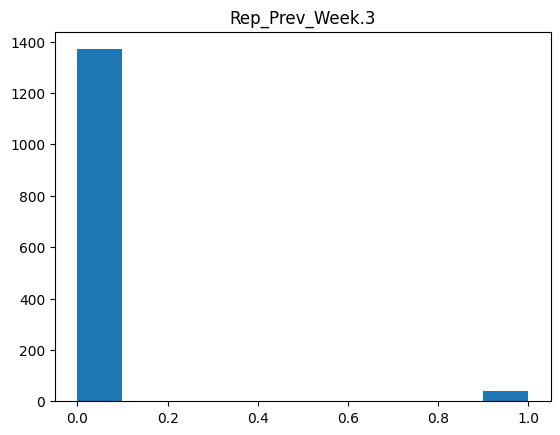

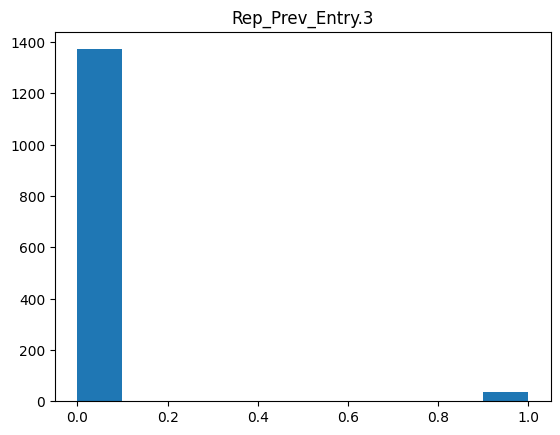

0
Date
8/1/2018     1
1/14/2021    1
1/26/2022    1
1/25/2022    1
1/24/2022    1
            ..
2/6/2020     1
2/5/2020     1
2/4/2020     1
2/3/2020     1
7/31/2023    1
Name: Date, Length: 1409, dtype: int64


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

print(df.dtypes)

import matplotlib.pyplot as plt
for col in df.columns:
    if df[col].dtype != 'object':
        plt.hist(df[col])
        plt.title(col)
        plt.show()

duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].value_counts())


In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract relevant date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

# Display the updated DataFrame
print(df.head())
print(df.dtypes)


   Day of the Week  Morning  Prev_Week  Rep_Prev_Week  Rep_Prev_Entry  \
0                3       19          7              0               0   
1                4       31         11              0               0   
2                5       15         19              0               0   
3                6       31         35              0               0   
4                1       31         18              0               0   

   Afternoon  Prev_Week.1  Rep_Prev_Week.1  Rep_Prev_Entry.1  Evening  \
0         14           13                0                 0       33   
1          3           21                0                 0       35   
2          9           19                0                 0       23   
3         21           20                0                 0       29   
4         31           30                0                 1       15   

   Prev_Week.2  Rep_Prev_Week.2  Rep_Prev_Entry.2  Night  Prev_Week.3  \
0           28                0                 0

In [5]:
# Check unique values before filtering
print("Unique Years (Before Filtering):", df['Year'].unique())
print("Unique Months (Before Filtering):", df['Month'].unique())
print("Unique Days (Before Filtering):", df['Day'].unique())


Unique Years (Before Filtering): [2018 2019 2020 2021 2022 2023]
Unique Months (Before Filtering): [ 8  9 10 11 12  1  2  3  4  5  6  7]
Unique Days (Before Filtering): [ 1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 27 28
 29 30 31  5 12 19 26]


In [6]:
# Display basic statistics about the dataset
print("Dataset Statistics:")
print(df.describe())

# Display information about missing values
print("Missing Values:")
print(df.isnull().sum())

# Display the first few rows of the dataset
print("First Few Rows:")
print(df.head())


Dataset Statistics:
       Day of the Week      Morning    Prev_Week  Rep_Prev_Week  \
count      1409.000000  1409.000000  1409.000000    1409.000000   
mean          3.493967    18.766501    18.191625       0.026969   
std           1.711052    10.276234    10.576569       0.162052   
min           1.000000     1.000000     0.000000       0.000000   
25%           2.000000    10.000000     9.000000       0.000000   
50%           3.000000    19.000000    18.000000       0.000000   
75%           5.000000    28.000000    27.000000       0.000000   
max           6.000000    36.000000    36.000000       1.000000   

       Rep_Prev_Entry    Afternoon  Prev_Week.1  Rep_Prev_Week.1  \
count     1409.000000  1409.000000  1409.000000      1409.000000   
mean         0.014904    18.613911    18.112136         0.022001   
std          0.121213    10.356362    10.651714         0.146740   
min          0.000000     1.000000     0.000000         0.000000   
25%          0.000000     9.000000  

In [7]:
# Define the target variable names
target_variables = ['Prediction1', 'Prediction2', 'Prediction3', 'Prediction4']

# Create or define the target variable columns in the original DataFrame
for target_variable in target_variables:
    df[target_variable] = 0  # Initialize with zeros for now, you can replace with actual values

# Display the updated DataFrame to confirm the new columns
print(df.head())

# Define the training and testing date ranges
train_start_year = 2018
train_start_month = 8
train_start_day = 1

train_end_year = 2022
train_end_month = 7
train_end_day = 31

test_start_year = 2022
test_start_month = 8
test_start_day = 1

test_end_year = 2023
test_end_month = 7
test_end_day = 31

# Filter the DataFrame for training data
train_data = df[(df['Year'] >= train_start_year) &
                 (df['Month'] >= train_start_month) &
                 (df['Day'] >= train_start_day) &
                 (df['Year'] <= train_end_year) &
                 (df['Month'] <= train_end_month) &
                 (df['Day'] <= train_end_day)]

# Filter the DataFrame for testing data
test_data = df[(df['Year'] >= test_start_year) &
                (df['Month'] >= test_start_month) &
                (df['Day'] >= test_start_day) &
                (df['Year'] <= test_end_year) &
                (df['Month'] <= test_end_month) &
                (df['Day'] <= test_end_day)]


   Day of the Week  Morning  Prev_Week  Rep_Prev_Week  Rep_Prev_Entry  \
0                3       19          7              0               0   
1                4       31         11              0               0   
2                5       15         19              0               0   
3                6       31         35              0               0   
4                1       31         18              0               0   

   Afternoon  Prev_Week.1  Rep_Prev_Week.1  Rep_Prev_Entry.1  Evening  ...  \
0         14           13                0                 0       33  ...   
1          3           21                0                 0       35  ...   
2          9           19                0                 0       23  ...   
3         21           20                0                 0       29  ...   
4         31           30                0                 1       15  ...   

   Prev_Week.3  Rep_Prev_Week.3  Rep_Prev_Entry.3  Year  Month  Day  \
0            7       

In [8]:
# Check unique values after filtering
print("Unique Years (After Filtering):", train_data['Year'].unique())
print("Unique Months (After Filtering):", train_data['Month'].unique())
print("Unique Days (After Filtering):", train_data['Day'].unique())


Unique Years (After Filtering): []
Unique Months (After Filtering): []
Unique Days (After Filtering): []


In [9]:
print("Column Names:", train_data.columns)

Column Names: Index(['Day of the Week', 'Morning', 'Prev_Week', 'Rep_Prev_Week',
       'Rep_Prev_Entry', 'Afternoon', 'Prev_Week.1', 'Rep_Prev_Week.1',
       'Rep_Prev_Entry.1', 'Evening', 'Prev_Week.2', 'Rep_Prev_Week.2',
       'Rep_Prev_Entry.2', 'Night', 'Prev_Week.3', 'Rep_Prev_Week.3',
       'Rep_Prev_Entry.3', 'Year', 'Month', 'Day', 'Prediction1',
       'Prediction2', 'Prediction3', 'Prediction4'],
      dtype='object')


In [10]:
# Print unique values in the 'Year', 'Month', and 'Day' columns
print("Unique Years:", df['Year'].unique())
print("Unique Months:", df['Month'].unique())
print("Unique Days:", df['Day'].unique())



Unique Years: [2018 2019 2020 2021 2022 2023]
Unique Months: [ 8  9 10 11 12  1  2  3  4  5  6  7]
Unique Days: [ 1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 27 28
 29 30 31  5 12 19 26]


In [11]:
# Display basic statistics about the dataset
print("Dataset Statistics:")
print(df.describe())

# Display information about missing values
print("Missing Values:")
print(df.isnull().sum())

# Display the first few rows of the dataset
print("First Few Rows:")
print(df.head())

Dataset Statistics:
       Day of the Week      Morning    Prev_Week  Rep_Prev_Week  \
count      1409.000000  1409.000000  1409.000000    1409.000000   
mean          3.493967    18.766501    18.191625       0.026969   
std           1.711052    10.276234    10.576569       0.162052   
min           1.000000     1.000000     0.000000       0.000000   
25%           2.000000    10.000000     9.000000       0.000000   
50%           3.000000    19.000000    18.000000       0.000000   
75%           5.000000    28.000000    27.000000       0.000000   
max           6.000000    36.000000    36.000000       1.000000   

       Rep_Prev_Entry    Afternoon  Prev_Week.1  Rep_Prev_Week.1  \
count     1409.000000  1409.000000  1409.000000      1409.000000   
mean         0.014904    18.613911    18.112136         0.022001   
std          0.121213    10.356362    10.651714         0.146740   
min          0.000000     1.000000     0.000000         0.000000   
25%          0.000000     9.000000  

Unique values in Rep_Prev_Week: [0 1]
Unique values in Rep_Prev_Entry: [0 1]
Unique values in Rep_Prev_Week.1: [0 1]
Unique values in Rep_Prev_Entry.1: [0 1]
Unique values in Rep_Prev_Week.2: [0 1]
Unique values in Rep_Prev_Entry.2: [0 1]
Unique values in Rep_Prev_Week.3: [0 1]
Unique values in Rep_Prev_Entry.3: [0 1]


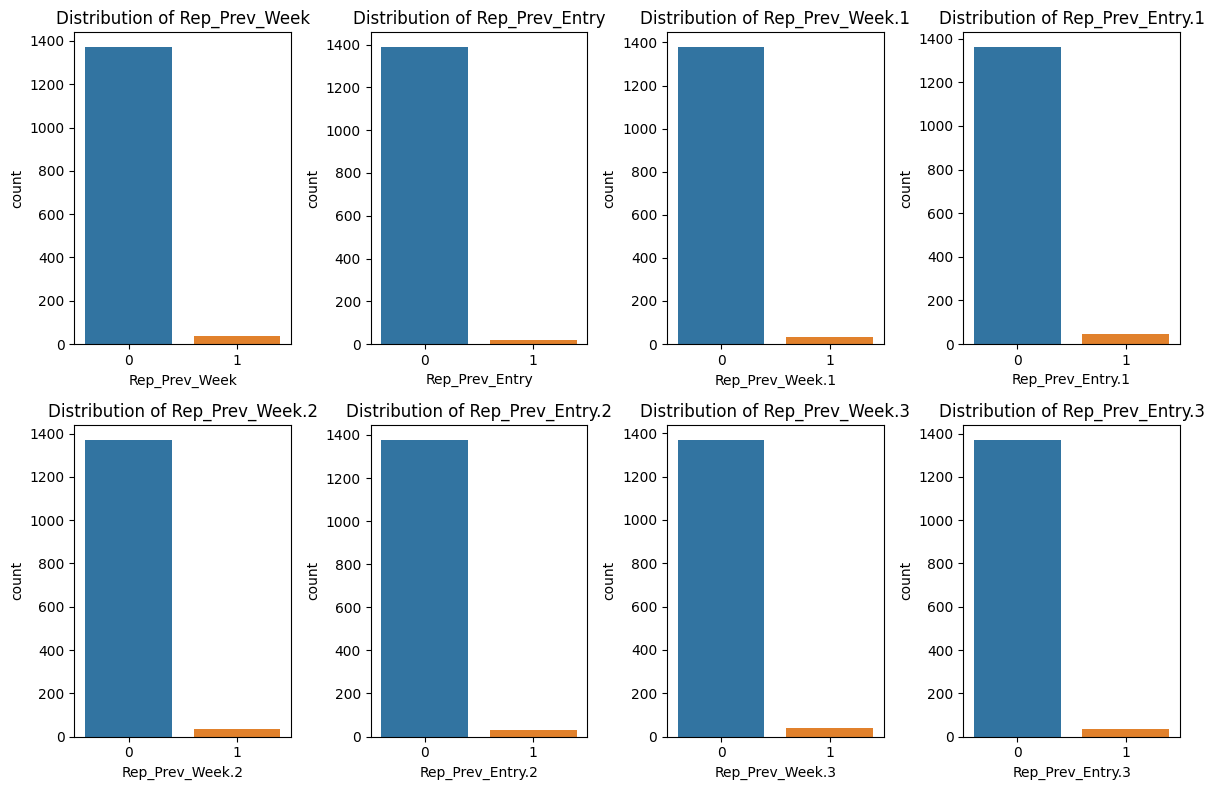

In [12]:
# Display unique values in each binary column
for col in df.columns:
    if col.startswith("Rep_Prev_") or col.startswith("Rep_Prev_Entry"):
        unique_values = df[col].unique()
        print(f"Unique values in {col}:", unique_values)

# Check the distribution of values in each binary column
import matplotlib.pyplot as plt
import seaborn as sns

binary_columns = [col for col in df.columns if col.startswith("Rep_Prev_") or col.startswith("Rep_Prev_Entry")]

plt.figure(figsize=(12, 8))
for i, col in enumerate(binary_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [13]:
# Replace 'Prediction1' with your actual target variable
correlation_matrix = df[['Rep_Prev_Week', 'Rep_Prev_Entry', 'Rep_Prev_Week.1', 'Rep_Prev_Entry.1', 'Rep_Prev_Week.2', 'Rep_Prev_Entry.2', 'Rep_Prev_Week.3', 'Rep_Prev_Entry.3', 'Prediction1', 'Prediction2', 'Prediction3', 'Prediction4']].corr()

# Display the correlation matrix
print(correlation_matrix)


                  Rep_Prev_Week  Rep_Prev_Entry  Rep_Prev_Week.1  \
Rep_Prev_Week          1.000000        0.015679         0.004897   
Rep_Prev_Entry         0.015679        1.000000        -0.018449   
Rep_Prev_Week.1        0.004897       -0.018449         1.000000   
Rep_Prev_Entry.1       0.017038        0.041479         0.025177   
Rep_Prev_Week.2       -0.027340        0.016430         0.096398   
Rep_Prev_Entry.2       0.004897       -0.018449        -0.022496   
Rep_Prev_Week.3       -0.001384       -0.020753         0.004186   
Rep_Prev_Entry.3       0.054855        0.089689         0.005626   
Prediction1                 NaN             NaN              NaN   
Prediction2                 NaN             NaN              NaN   
Prediction3                 NaN             NaN              NaN   
Prediction4                 NaN             NaN              NaN   

                  Rep_Prev_Entry.1  Rep_Prev_Week.2  Rep_Prev_Entry.2  \
Rep_Prev_Week             0.017038        

In [14]:
# Check for missing values in binary columns
binary_columns = ['Rep_Prev_Week', 'Rep_Prev_Entry', 'Rep_Prev_Week.1', 'Rep_Prev_Entry.1', 'Rep_Prev_Week.2', 'Rep_Prev_Entry.2', 'Rep_Prev_Week.3', 'Rep_Prev_Entry.3']

missing_values_binary = df[binary_columns].isnull().sum()

# Display missing values in binary columns
print("Missing Values in Binary Columns:")
print(missing_values_binary)


Missing Values in Binary Columns:
Rep_Prev_Week       0
Rep_Prev_Entry      0
Rep_Prev_Week.1     0
Rep_Prev_Entry.1    0
Rep_Prev_Week.2     0
Rep_Prev_Entry.2    0
Rep_Prev_Week.3     0
Rep_Prev_Entry.3    0
dtype: int64


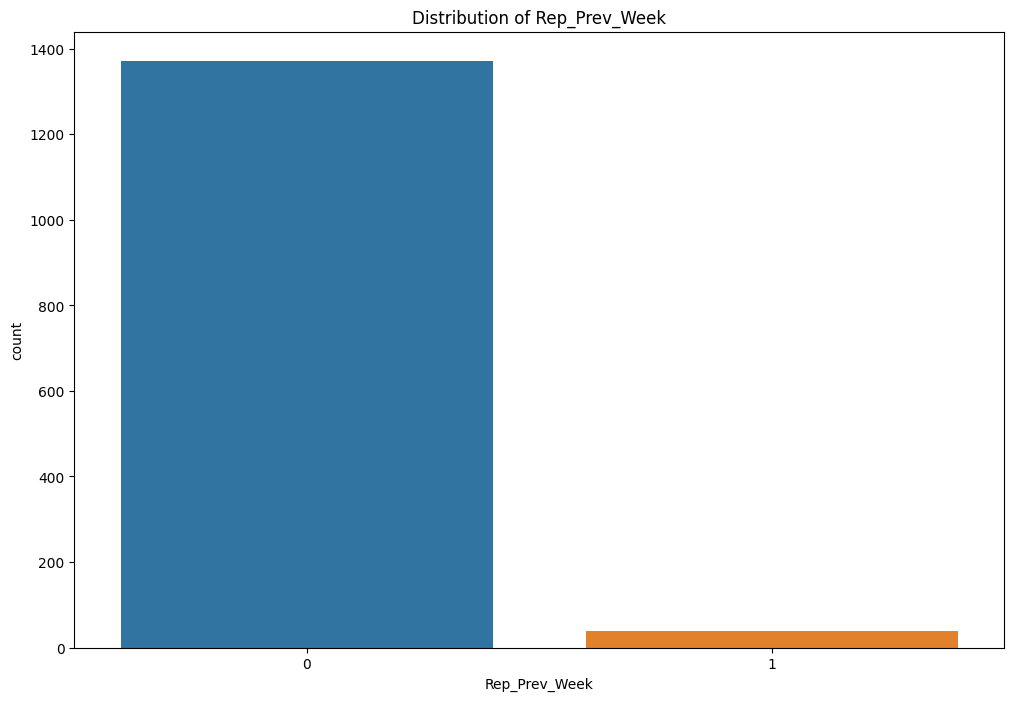

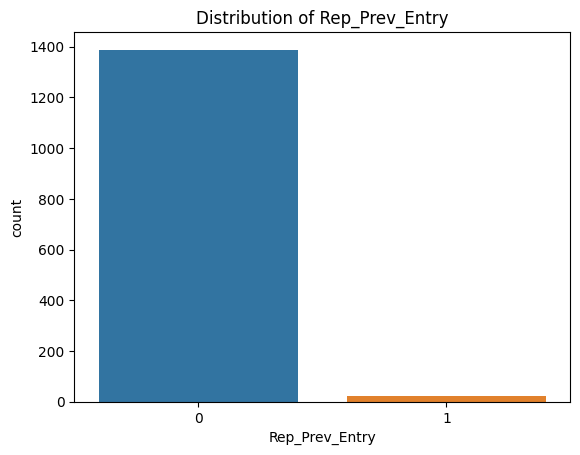

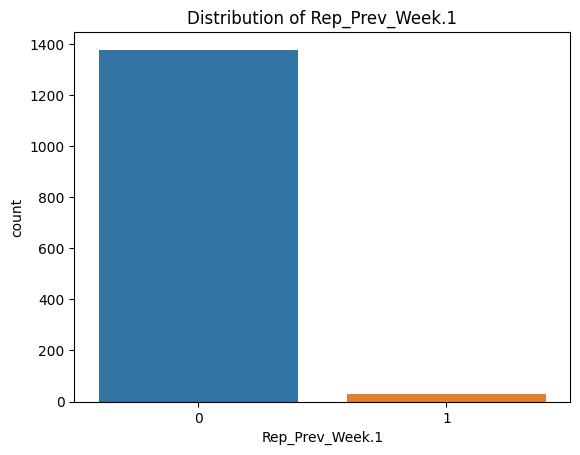

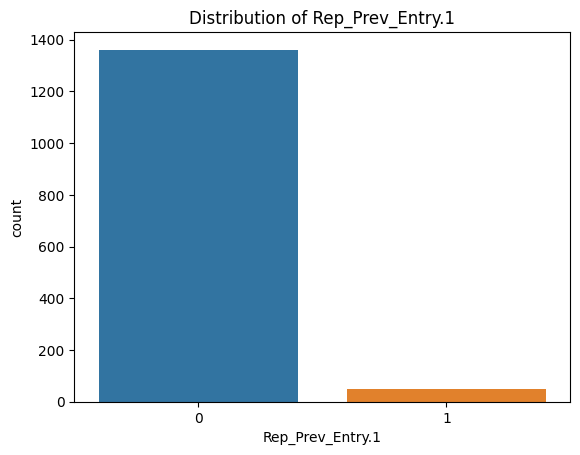

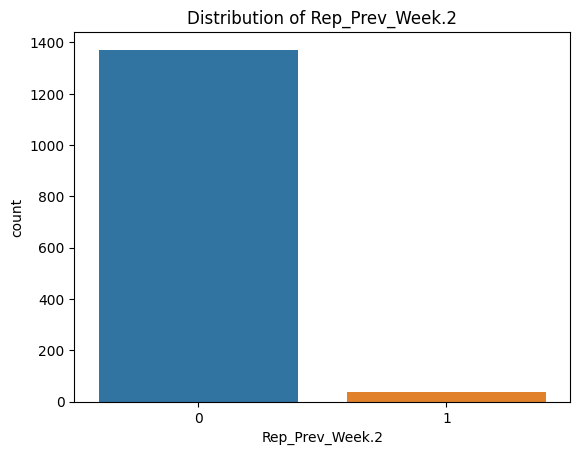

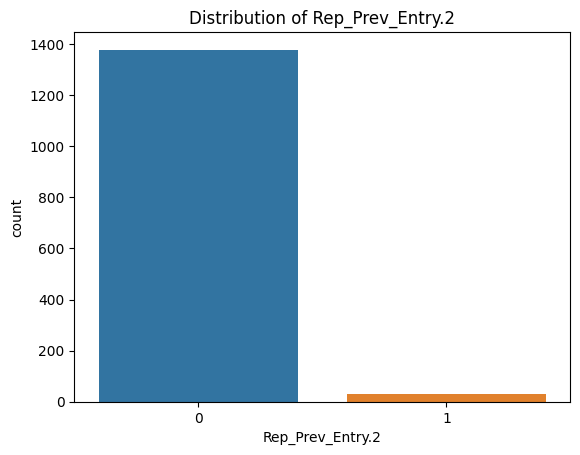

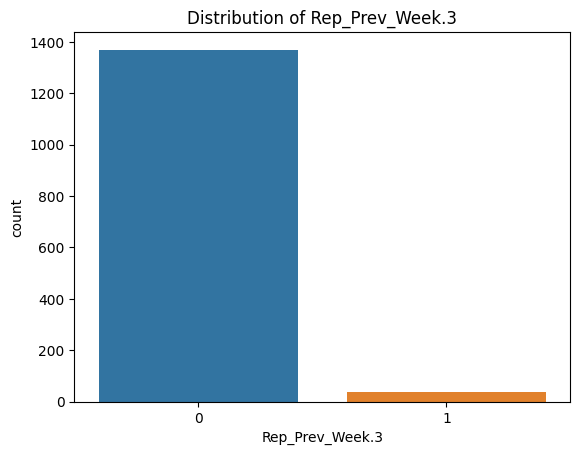

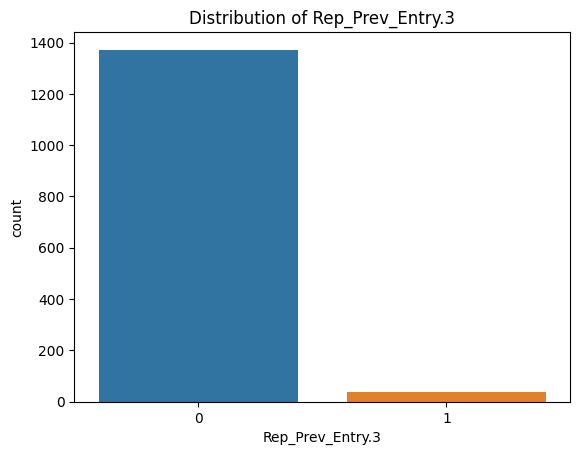

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of binary columns
plt.figure(figsize=(12, 8))
for column in binary_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()


In [16]:
# Replace 'Prediction1' with your actual target variable
correlation_matrix = df[binary_columns + target_variables].corr()

# Display the correlation matrix
print(correlation_matrix)


                  Rep_Prev_Week  Rep_Prev_Entry  Rep_Prev_Week.1  \
Rep_Prev_Week          1.000000        0.015679         0.004897   
Rep_Prev_Entry         0.015679        1.000000        -0.018449   
Rep_Prev_Week.1        0.004897       -0.018449         1.000000   
Rep_Prev_Entry.1       0.017038        0.041479         0.025177   
Rep_Prev_Week.2       -0.027340        0.016430         0.096398   
Rep_Prev_Entry.2       0.004897       -0.018449        -0.022496   
Rep_Prev_Week.3       -0.001384       -0.020753         0.004186   
Rep_Prev_Entry.3       0.054855        0.089689         0.005626   
Prediction1                 NaN             NaN              NaN   
Prediction2                 NaN             NaN              NaN   
Prediction3                 NaN             NaN              NaN   
Prediction4                 NaN             NaN              NaN   

                  Rep_Prev_Entry.1  Rep_Prev_Week.2  Rep_Prev_Entry.2  \
Rep_Prev_Week             0.017038        

In [17]:
# Create a correlation matrix
correlation_matrix = df[binary_columns + target_variables].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Rep_Prev_Week  Rep_Prev_Entry  Rep_Prev_Week.1  \
Rep_Prev_Week          1.000000        0.015679         0.004897   
Rep_Prev_Entry         0.015679        1.000000        -0.018449   
Rep_Prev_Week.1        0.004897       -0.018449         1.000000   
Rep_Prev_Entry.1       0.017038        0.041479         0.025177   
Rep_Prev_Week.2       -0.027340        0.016430         0.096398   
Rep_Prev_Entry.2       0.004897       -0.018449        -0.022496   
Rep_Prev_Week.3       -0.001384       -0.020753         0.004186   
Rep_Prev_Entry.3       0.054855        0.089689         0.005626   
Prediction1                 NaN             NaN              NaN   
Prediction2                 NaN             NaN              NaN   
Prediction3                 NaN             NaN              NaN   
Prediction4                 NaN             NaN              NaN   

                  Rep_Prev_Entry.1  Rep_Prev_Week.2  Rep_Prev_Entry.2  \
Rep_Prev_Week         

In [18]:
# Check for conflicting data in binary columns
conflicting_data = []
for column in binary_columns:
    unique_values = df[column].unique()
    if len(unique_values) > 2 or (0 in unique_values and 1 in unique_values):
        conflicting_data.append(column)

# Display columns with conflicting data
if conflicting_data:
    print(f"Columns with conflicting data: {conflicting_data}")
else:
    print("No conflicting data found in binary columns.")


Columns with conflicting data: ['Rep_Prev_Week', 'Rep_Prev_Entry', 'Rep_Prev_Week.1', 'Rep_Prev_Entry.1', 'Rep_Prev_Week.2', 'Rep_Prev_Entry.2', 'Rep_Prev_Week.3', 'Rep_Prev_Entry.3']


In [19]:
# Display data types of all columns
print("Data Types:")
print(df.dtypes)



Data Types:
Day of the Week     int64
Morning             int64
Prev_Week           int64
Rep_Prev_Week       int64
Rep_Prev_Entry      int64
Afternoon           int64
Prev_Week.1         int64
Rep_Prev_Week.1     int64
Rep_Prev_Entry.1    int64
Evening             int64
Prev_Week.2         int64
Rep_Prev_Week.2     int64
Rep_Prev_Entry.2    int64
Night               int64
Prev_Week.3         int64
Rep_Prev_Week.3     int64
Rep_Prev_Entry.3    int64
Year                int64
Month               int64
Day                 int64
Prediction1         int64
Prediction2         int64
Prediction3         int64
Prediction4         int64
dtype: object


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to scale (excluding day-related columns and entries columns)
columns_to_scale = ['Prev_Week', 'Rep_Prev_Week', 'Rep_Prev_Entry',
                    'Prev_Week.1', 'Rep_Prev_Week.1', 'Rep_Prev_Entry.1',
                    'Prev_Week.2', 'Rep_Prev_Week.2', 'Rep_Prev_Entry.2',
                    'Prev_Week.3', 'Rep_Prev_Week.3', 'Rep_Prev_Entry.3']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled dataset
print("Scaled Dataset:")
print(df.head())



Scaled Dataset:
   Day of the Week  Morning  Prev_Week  Rep_Prev_Week  Rep_Prev_Entry  \
0                3       19   0.194444            0.0             0.0   
1                4       31   0.305556            0.0             0.0   
2                5       15   0.527778            0.0             0.0   
3                6       31   0.972222            0.0             0.0   
4                1       31   0.500000            0.0             0.0   

   Afternoon  Prev_Week.1  Rep_Prev_Week.1  Rep_Prev_Entry.1  Evening  ...  \
0         14     0.361111              0.0               0.0       33  ...   
1          3     0.583333              0.0               0.0       35  ...   
2          9     0.527778              0.0               0.0       23  ...   
3         21     0.555556              0.0               0.0       29  ...   
4         31     0.833333              0.0               1.0       15  ...   

   Prev_Week.3  Rep_Prev_Week.3  Rep_Prev_Entry.3  Year  Month  Day  \
0    

In [21]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Define the features (X) and target variables (y) for training
X_train = train_data.drop(target_variables, axis=1)
y_train = train_data[target_variables]

# Train the Random Forest Regressor model
random_forest_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = random_forest_model.predict(X_train)

# Evaluate the model performance on the training set using Mean Squared Error
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Training Mean Squared Error: {train_mse}")





ValueError: ignored

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

